In [55]:
import pandas as pd
import numpy as np

In [165]:
#Read csv
creditDef = pd.read_csv('C:\\Users\\Owner\\Documents\\DataAnalyticsCourse\\C5_Task2\\defaulter_clients.csv', header =1)
creditDef.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [166]:
#Convert some of the  variables to categorical and ordinal as appropriate
catCols = ['SEX','MARRIAGE','default payment next month']
creditDef[catCols] = creditDef[catCols].astype('category')
ordCols =['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
ordCatOrder = [8,7,6,5,4,3,2,1,0,-1,-2]

catType1= pd.api.types.CategoricalDtype(categories = [8,7,6,5,4,3,2,1,0,-1,-2],ordered=True)
creditDef[ordCols] = creditDef[ordCols].astype(catType1)
ordCols2 = ['EDUCATION']
ordCatOrder2 = [0,4,5,6,3,2,1]
catType2= pd.api.types.CategoricalDtype(categories = [0,4,5,6,3,2,1],ordered=True)
creditDef[ordCols2] = creditDef[ordCols2].astype(catType2)

rmCols = ['ID']
creditDefNoID = creditDef.drop(rmCols,axis=1)
creditDefNoID.head()


#Remove id column 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [167]:
print(creditDefNoID['PAY_0'].unique())
print(creditDefNoID['EDUCATION'].unique())

#Print categories of couple of categorical indepnedent variables

[2, -1, 0, -2, 1, ..., 4, 8, 7, 5, 6]
Length: 11
Categories (11, int64): [8 < 7 < 6 < 5 ... 1 < 0 < -1 < -2]
[2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [0 < 4 < 5 < 6 < 3 < 2 < 1]


In [168]:
#Overall summary description of dataset
print(creditDefNoID.dtypes)
print(creditDefNoID.describe())



LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
dtype: object
            LIMIT_BAL           AGE      BILL_AMT1

In [74]:
#remove Na
NaList=pd.isna(creditDefNoID)
NaList.any()
#No NA found


LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [75]:
#Remove Nulls
NullList=pd.isnull(creditDefNoID)
NullList.any()

#No NULLs

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [170]:
#Make negative numbers to be zero.
numData = creditDefNoID._get_numeric_data()
numData[numData<0]=0
print(creditDefNoID.describe())


            LIMIT_BAL           AGE     BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.00000   30000.000000   
mean    167484.322667     35.485500   51246.04190   49206.518033   
std     129747.661567      9.217904   73608.02908   71150.744613   
min      10000.000000     21.000000       0.00000       0.000000   
25%      50000.000000     28.000000    3558.75000    2984.750000   
50%     140000.000000     34.000000   22381.50000   21200.000000   
75%     240000.000000     41.000000   67091.00000   64006.250000   
max    1000000.000000     79.000000  964511.00000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.704517e+04   43299.651933   40347.092100   38942.268767   
std    6.931878e+04   64294.968472   60766.619726   59445.970807   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    2.666250e+03    2326.750000    1763.0000

In [77]:
#Write the modified data to csv
creditDefNoID.to_csv('C:\\Users\\Owner\\Documents\\DataAnalyticsCourse\\C5_Task2\\defaulter_clients_processed.csv')

In [86]:
#Load modules for plotting
import matplotlib.pyplot as plt
import seaborn as sns 

In [85]:
header = creditDefNoID.dtypes.index
print(header)
print(creditDefNoID.info())
print(creditDefNoID['default payment next month'].value_counts())
# 23364 non-defaulters
# 6636 defaulters (28%)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6        

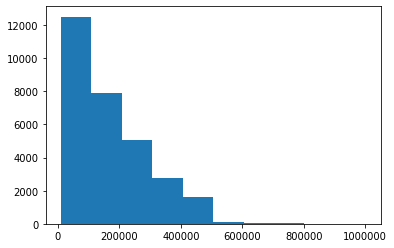

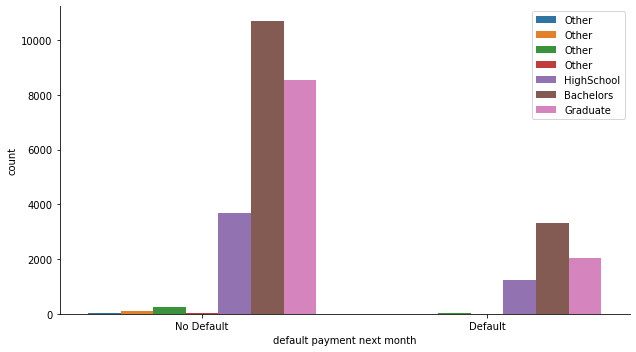

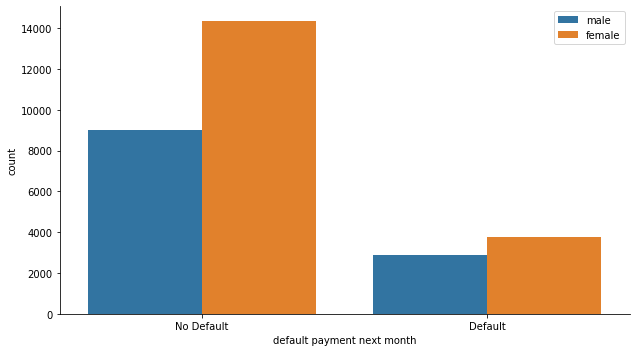

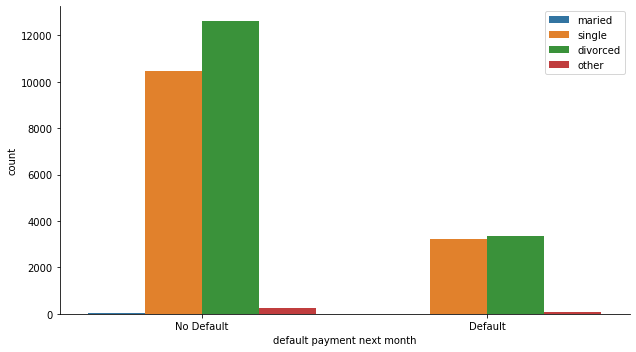

In [106]:
#Distribution of credit limit balance
plt.hist(creditDefNoID['LIMIT_BAL'])
plt.show()
g = sns.catplot('default payment next month', data=creditDefNoID, hue='EDUCATION', kind='count', aspect=1.75,legend=False)
g.set_xlabels('default payment next month')
g.set_xticklabels(['No Default','Default'])
plt.legend(labels=['Other','Other','Other','Other','HighSchool','Bachelors','Graduate'])

g = sns.catplot('default payment next month', data=creditDefNoID, hue='SEX', kind='count', aspect=1.75,legend=False)
g.set_xlabels('default payment next month')
g.set_xticklabels(['No Default','Default'])
plt.legend(labels=['male','female'])


g = sns.catplot('default payment next month', data=creditDefNoID, hue='MARRIAGE', kind='count', aspect=1.75,legend=False)
g.set_xlabels('default payment next month')
g.set_xticklabels(['No Default','Default'])
plt.legend(labels=['maried','single','divorced','other'])

#The number of customers with university/bachelor's degree and graduate degree are higher and correspondingly the number of defaulters in these 2 groups is high.
#The percentage of defaulters is high among the high school education holders compared to people with other education background
#The number of female customers and the number of defaulters is marginally higher among females compared to males. The percentage of defaulters is the same
#The number of married customers is marginally higher compared to single customers but the percentage of defaulters are not significantly different
#When grouped by 'sex' or 'marital status' the number of defaulters is highest for people with university/bacheclor's education background


In [128]:
DefList = creditDefNoID[creditDefNoID['default payment next month']==1]
table1 = pd.pivot_table(DefList,values=['default payment next month'], index=['SEX'], columns=['EDUCATION'], aggfunc=np.sum,fill_value=0)

table1.index = ['male','female']
table1.columns = ['Other4','Other5','Other6','HighSchool','Bachelors','GradSchool']

print(table1)

table2 = pd.pivot_table(DefList,values=['default payment next month'], index=['MARRIAGE'], columns=['EDUCATION'], aggfunc=np.sum,fill_value=0)
table2.index = ['Other','Married','Single','Divorced']

table2.columns = ['Other4','Other5','Other6','HighSchool','Bachelors','GradSchool']

print(table2)



        Other4  Other5  Other6  HighSchool  Bachelors  GradSchool
male         4       6       4         545       1408         906
female       3      12       4         692       1922        1130
          Other4  Other5  Other6  HighSchool  Bachelors  GradSchool
Other          0       0       0           4          1           0
Married        3       9       5         754       1666         769
Single         4       9       3         452       1619        1254
Divorced       0       0       0          27         44          13


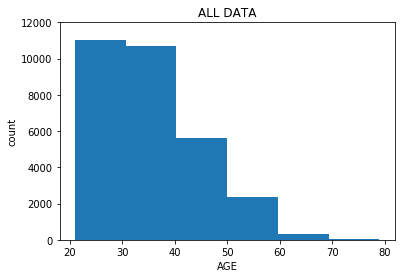

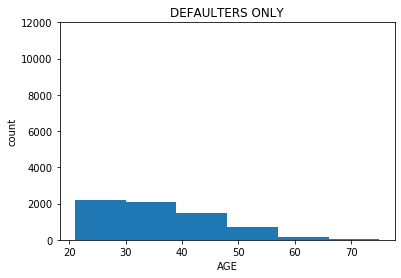

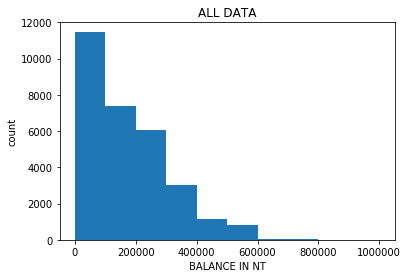

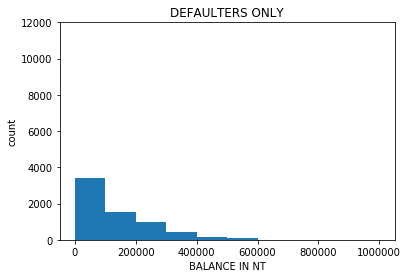

30000
6636


In [153]:
plt.hist(creditDefNoID['AGE'], bins=6)
plt.ylim(0,12000)
plt.xlabel('AGE')
plt.title('ALL DATA')
plt.ylabel('count')


plt.show()

plt.hist(DefList['AGE'], bins=6)
plt.ylim(0,12000)
plt.xlabel('AGE')
plt.title('DEFAULTERS ONLY')
plt.ylabel('count')




plt.show()

#plt.plot(creditDefNoID['LIMIT_BAL'])
#plt.show()

plt.hist(creditDefNoID['LIMIT_BAL'],bins=[0, 100000 ,200000, 300000, 400000 ,500000, 600000, 700000, 800000 ,900000, 1000000])
plt.ylim(0,12000)
plt.xlabel('BALANCE IN NT')
plt.title('ALL DATA')
plt.ylabel('count')



plt.show()

plt.hist(DefList['LIMIT_BAL'], bins=[0, 100000 ,200000, 300000, 400000 ,500000, 600000, 700000, 800000 ,900000, 1000000])
plt.ylim(0,12000)
plt.xlabel('BALANCE IN NT')
plt.title('DEFAULTERS ONLY')
plt.ylabel('count')

plt.show()

print(len(creditDefNoID))
print(len(DefList))

#Majority of customers are in age group 20- 40 and majority of defaulters are in age group 20- 40
#The percentage of defaulters is very similar across age groups ( in range 15-30%)
#Majority of customers and defaulters have limit less than 300000
#The percentage of defaulters is very similar across the credit limit range






Text(0.5, 1, 'Divorced')

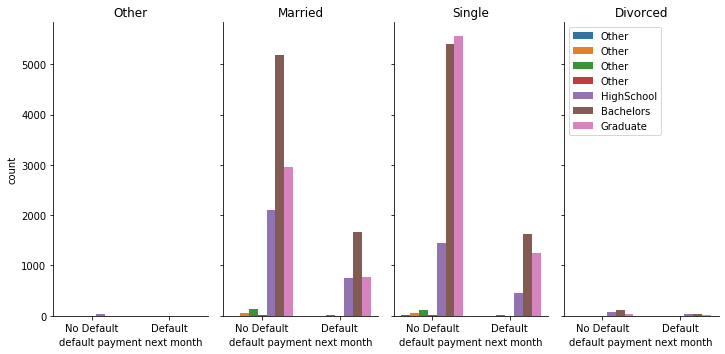

In [193]:
g2 = sns.catplot('default payment next month', data=creditDefNoID,kind='count', hue='EDUCATION',col='MARRIAGE',aspect=0.5,legend=False)
#g2.set_xlabels('default payment next month')
g2.set_xticklabels(['No Default','Default'])
plt.legend(labels=['Other','Other','Other','Other','HighSchool','Bachelors','Graduate'])

g2Axes=g2.axes.flatten()
g2Axes[0].set_title('Other')
g2Axes[1].set_title('Married')
g2Axes[2].set_title('Single')
g2Axes[3].set_title('Divorced')




#Single people with graduate level education appear to be the highest category of customers
#Percentage of defaulters for bachelor/university educated people among single and married people are the same
#Percentage of defaulters among single people with graduate level education is a bit lower than married people with graduate level education

Text(0.5, 1, 'Female')

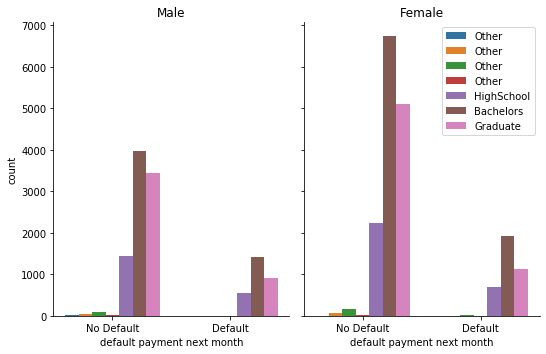

In [190]:
g3 = sns.catplot('default payment next month', data=creditDefNoID,kind='count', hue='EDUCATION',col='SEX',aspect=0.75,legend=False)
g3.set_xticklabels(['No Default','Default'])
plt.legend(labels=['Other','Other','Other','Other','HighSchool','Bachelors','Graduate'])


#g3.set_titles(['Other','Married','Single','Divorced']
#PlotTitles = ['Male','female']

#g3.set_titles(['Male','Female'])
g3Axes=g3.axes.flatten()
g3Axes[0].set_title('Male')
g3Axes[1].set_title('Female')

#Number of females with higher level education is more than that of males
#Percentage of defaulters among highly educated female customers was much lower than the corresponding males.

Text(0.5, 1.0, 'Defaulters ONly')

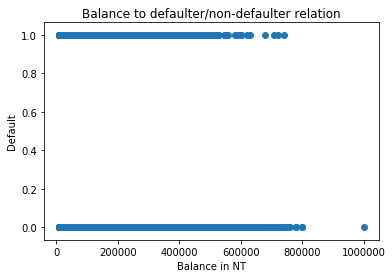

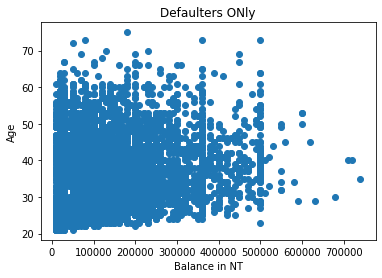

In [159]:
plt.scatter(creditDefNoID['LIMIT_BAL'],creditDefNoID['default payment next month'])
plt.xlabel('Balance in NT')
plt.ylabel('Default')
plt.title('Balance to defaulter/non-defaulter relation')


plt.figure()

plt.scatter(DefList['LIMIT_BAL'],DefList['AGE'])
plt.xlabel('Balance in NT')
plt.ylabel('Age')
plt.title('Defaulters ONly')



#Balance Limit above 600000 customers are less likely to default
#Most defaulters are in age group 25-55 and balance limits less than 400000

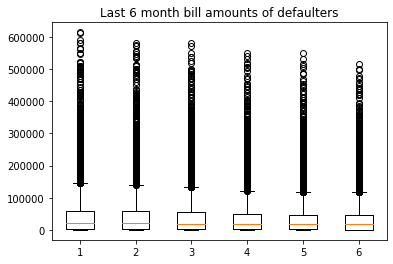

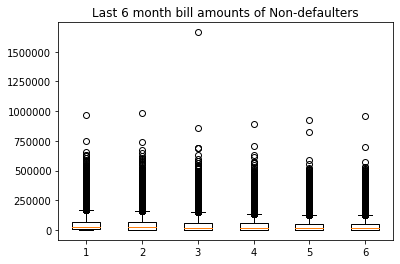

In [197]:
data = [DefList['BILL_AMT1'], DefList['BILL_AMT2'],DefList['BILL_AMT3'],DefList['BILL_AMT4'],DefList['BILL_AMT5'],DefList['BILL_AMT6']]
fig1, ax1 = plt.subplots()
ax1.set_title('Last 6 month bill amounts of defaulters')
ax1.boxplot(data)

plt.show()

NoDefList = creditDefNoID[creditDefNoID['default payment next month']==0]

data2 = [NoDefList['BILL_AMT1'], NoDefList['BILL_AMT2'],NoDefList['BILL_AMT3'],NoDefList['BILL_AMT4'],NoDefList['BILL_AMT5'],NoDefList['BILL_AMT6']]
fig2, ax2 = plt.subplots()
ax2.set_title('Last 6 month bill amounts of Non-defaulters')
ax2.boxplot(data2)

plt.show()


# the monthly balance of most people is 150000 or less. This does not change much between defaulters and non- defaulters.

In [161]:
corrMat = creditDefNoID.corr()
print(corrMat)

covMat = creditDefNoID.cov()
print(covMat)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285698   0.278569   0.283514   0.294369   
AGE         0.144713  1.000000   0.056252   0.054350   0.053873   0.051583   
BILL_AMT1   0.285698  0.056252   1.000000   0.952279   0.893249   0.861244   
BILL_AMT2   0.278569  0.054350   0.952279   1.000000   0.928928   0.893297   
BILL_AMT3   0.283514  0.053873   0.893249   0.928928   1.000000   0.924873   
BILL_AMT4   0.294369  0.051583   0.861244   0.893297   0.924873   1.000000   
BILL_AMT5   0.295848  0.049414   0.830523   0.860281   0.884569   0.940943   
BILL_AMT6   0.291505  0.047598   0.804333   0.832979   0.854801   0.902608   
PAY_AMT1    0.195236  0.026147   0.143688   0.280361   0.244730   0.233159   
PAY_AMT2    0.178408  0.021785   0.100112   0.102437   0.316984   0.207674   
PAY_AMT3    0.210167  0.029247   0.156966   0.151160   0.132145   0.300246   
PAY_AMT4    0.203242  0.021379   0.158422   0.147547   0.143671 

#The bill amunts have strong correlation to previous bill amounts
#The pay amounts have no strong correlation between previous bill amounts or pay amounts

#Overall summary and recommendations:
#It appears the percentage of defaulters does not change significantly between different age groups, balance limits or education level
#Theere are fewer older customers than younger customers
#Higher crediat limits do not necessaril translate to higher defaults
#It is assumed that demographics is obtained for th eprimary member/customer of the family to avoid double counts

#It will be good to have information how many months  of payment has been completed, family income
#It will be good to have employment status information
#Focus needs to be on identfying defaulters among younger customers with lower credit limits in order to bring the number of defaulters down.
#Ideally, the goal is not to bring just the percentage of defaulters down.
